In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#data 
data = pd.read_csv("data/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [159]:
data.shape

(48895, 16)

In [160]:
#data.groupby('host_id').count().max()

In [161]:
#neighbourhood_group to first

data['id'] = data.index
data = data.set_index('neighbourhood_group')
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Brooklyn,0,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
Manhattan,1,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
Manhattan,2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
Brooklyn,3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
Manhattan,4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## 哪個區域的案件最多

In [162]:
data['neighbourhood_group'].count()

KeyError: 'neighbourhood_group'

In [132]:
#市 
data['neighbourhood_group'].value_counts()


KeyError: 'neighbourhood_group'

In [133]:

plt.figure(figsize=(15, 5)) #設定圖表的大小 (width * col)

sns.countplot(y="neighbourhood_group",
              data=data, 
              order = data['neighbourhood_group'].value_counts().index 
             )
plt.xticks(rotation=0) 

KeyError: 'neighbourhood_group'

<Figure size 1080x360 with 0 Axes>

In [134]:
#區
data['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text major ticklabel objects>)

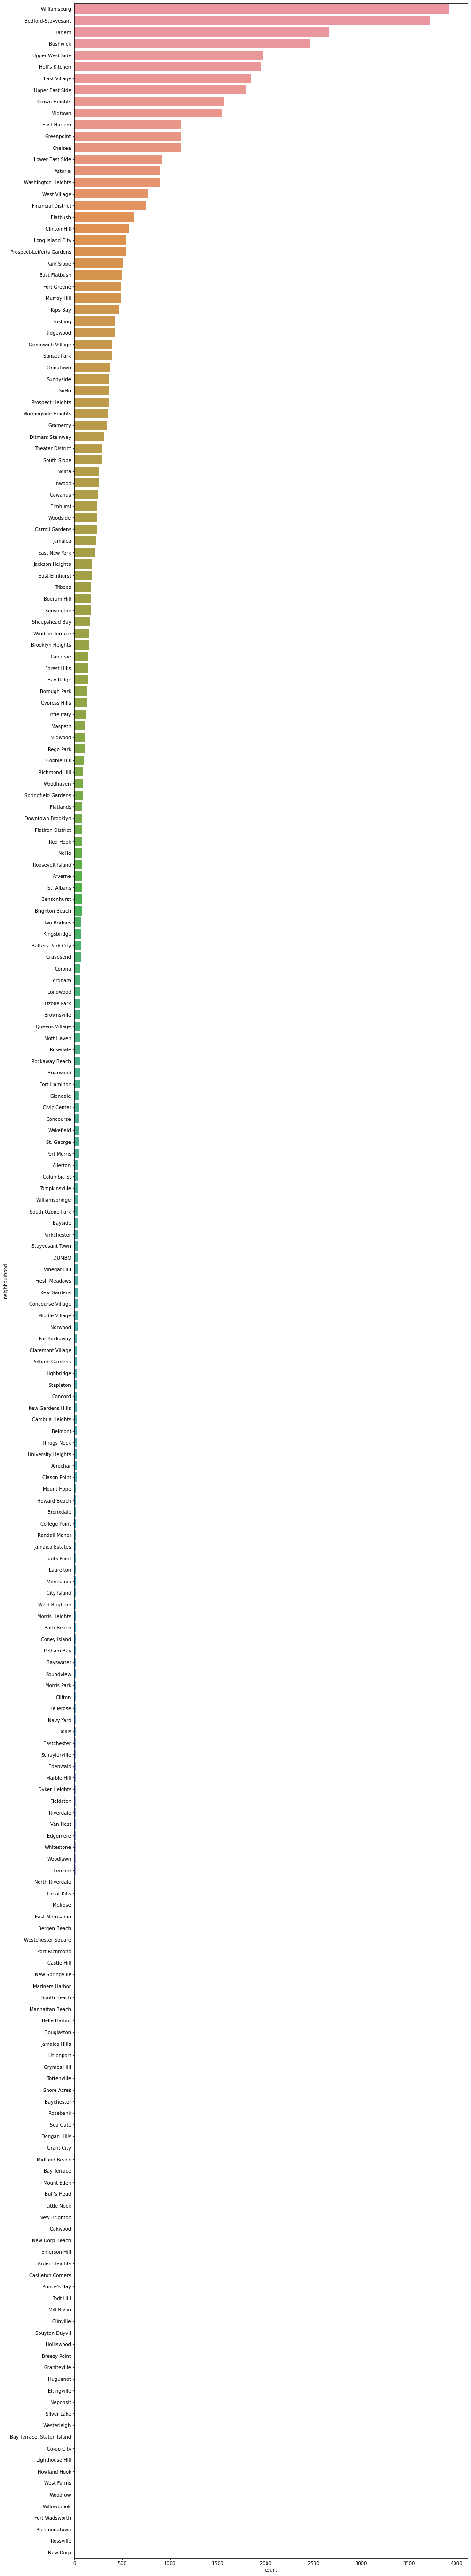

In [135]:
plt.figure(figsize=(15, 100)) #設定圖表的大小 (width * col)

sns.countplot(y="neighbourhood",
              data=data, 
              order = data['neighbourhood'].value_counts().index 
             )
plt.xticks(rotation=0) 

## 哪個區域的平均價格最高

Manhattan / 

In [163]:
#市

NG_price_s = data.groupby(by=['neighbourhood_group'])['price'].sum() 
NG_price_c = data.groupby(by=['neighbourhood_group'])['price'].count() 

NG_price = NG_price_s / NG_price_c

NG_price
NG_price.head()


#如何把輸出資料作圖


neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [137]:
NG_price_s = data.groupby(by=['neighbourhood_group'])['price'].count() 

NG_price_s

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: price, dtype: int64

In [138]:
#市

N_price_s = data.groupby(by=['neighbourhood'])['price'].sum() 
N_price_c = data.groupby(by=['neighbourhood'])['price'].count() 

N_price = N_price_s / N_price_c


# 怎麼可以把資料完全顯示
N_price


# 最大值是 800 ，怎麼知道哪個
#N_price.max()

neighbourhood
Allerton            87.595238
Arden Heights       67.250000
Arrochar           115.000000
Arverne            171.779221
Astoria            117.187778
                      ...    
Windsor Terrace    138.993631
Woodhaven           67.170455
Woodlawn            60.090909
Woodrow            700.000000
Woodside            85.097872
Name: price, Length: 221, dtype: float64

## 畫出不同區域各種房型的平均價格

In [147]:
#市

#N_price_s = data.groupby(by=['neighbourhood'])['room_type'].sum() ['price'].sum() 
#N_price_c = data.groupby(by=['neighbourhood'])['room_type'].sum() ['price'].count() 


#如果做 區域/房型/價格的總和 （三位）


data = data.reset_index()
data = data.set_index(['neighbourhood', 'room_type','price'])
data


,,,neighbourhood_group,id,name,host_id,host_name,latitude,longitude,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood,room_type,price,,,,,,,,,,,,,
Kensington,Private room,149,Brooklyn,0,Clean & quiet apt home by the park,2787,John,40.64749,-73.97237,1,9,2018-10-19,0.21,6,365
Midtown,Entire home/apt,225,Manhattan,1,Skylit Midtown Castle,2845,Jennifer,40.75362,-73.98377,1,45,2019-05-21,0.38,2,355
Harlem,Private room,150,Manhattan,2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.80902,-73.94190,3,0,NaN,NaN,1,365
Clinton Hill,Entire home/apt,89,Brooklyn,3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.68514,-73.95976,1,270,2019-07-05,4.64,1,194
East Harlem,Entire home/apt,80,Manhattan,4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.79851,-73.94399,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bedford-Stuyvesant,Private room,70,Brooklyn,48890,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,40.67853,-73.94995,2,0,NaN,NaN,2,9
Bushwick,Private room,40,Brooklyn,48891,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,40.70184,-73.93317,4,0,NaN,NaN,2,36
Harlem,Entire home/apt,115,Manhattan,48892,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,40.81475,-73.94867,10,0,NaN,NaN,1,27


### 擁有房間數目最多的前10名房東

In [140]:
data['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

## 擁有房間租金總額最多的前10名房東

## 那個區域比較熱門